In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.utils import plot_model
from tensorflow.keras import optimizers

from utils import *
mpl.rcParams.update({'font.size': 22})

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
# We don't use THRESHOLD_TEST.txt file, because it's samples taken from THRESHOLD_ALL.txt 
train_dataset = np.loadtxt("data/khasanshin/THRESHOLD_ALL.txt", delimiter=",")

In [5]:
# let`s see to 4-th column
X = train_dataset[:,0:600]
Y = train_dataset[:,600]

X_train, y_train, X_val, y_val = random_split_train_val(X, Y, 212)

In [6]:
# 4-th column = sum of 1,2,3 columns
x = X_train[1].reshape(4, 150)
xyz_sum = np.sum(x[:3, :], axis=0)
np.linalg.norm(xyz_sum - x[3])

0.06480740698407855

In [7]:
# no need for features linear combination 
X = train_dataset[:,0:450]
Y = train_dataset[:,600]

X_train, y_train, X_val, y_val = random_split_train_val(X, Y, 212)

In [11]:
# Punch Classes
num_classes = 5
names = ['YT', 'MT', 'AT', 'U', 'NP']

Take a look to the train and validation sets, we can see a little disbalance.

In [9]:
bins_train = np.bincount(y_train.astype(np.int))
bins_val = np.bincount(y_val.astype(np.int))
idx = np.arange(len(names))

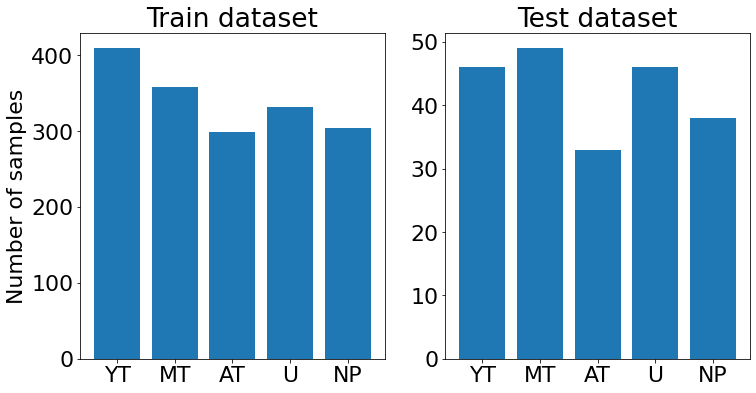

In [12]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title('Train dataset')
plt.bar(idx, bins_train)
plt.ylabel('Number of samples')
plt.xticks(idx, names)

plt.subplot(1, 2, 2)
plt.title('Test dataset')
plt.bar(idx, bins_val)
plt.xticks(idx, names)

plt.show()

Measurement raw data visualized for different punch classes

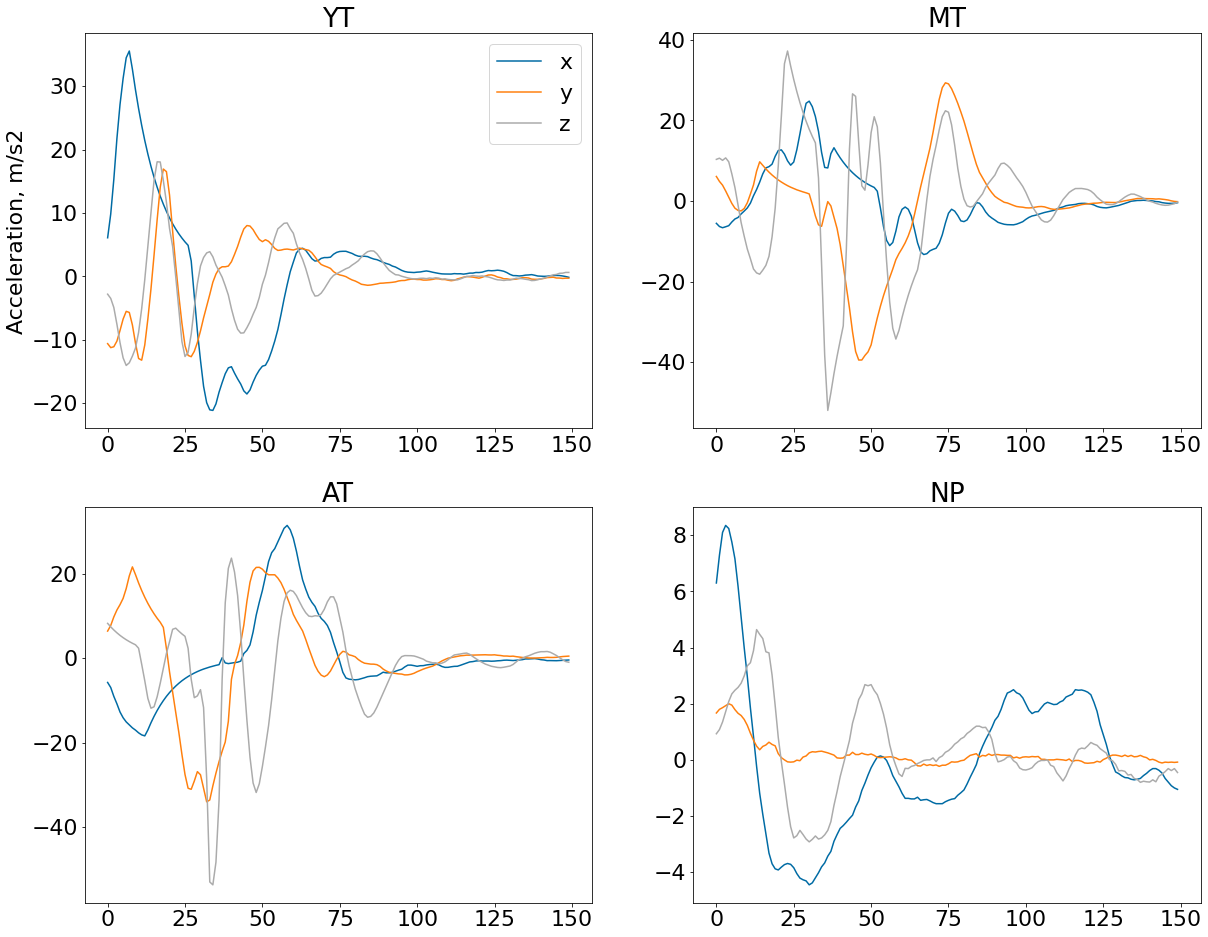

In [28]:
plt.figure(figsize=(20,16))

plt.style.use('tableau-colorblind10')
i = 667
plt.subplot(2,2,1)
plt.plot(X[i].reshape(3, 150).T)
plt.title(names[Y[i].astype(np.int)])
plt.legend(['x', 'y', 'z'])
plt.ylabel('Acceleration, m/s2')
i = 3
plt.subplot(2,2,2)
plt.plot(X[i].reshape(3, 150).T)
plt.title(names[Y[i].astype(np.int)])

i = 500
plt.subplot(2,2,3)
plt.plot(X[i].reshape(3, 150).T)
plt.title(names[Y[i].astype(np.int)])
i = 20
plt.subplot(2,2,4)
plt.plot(X[i].reshape(3, 150).T)
plt.title(names[Y[i].astype(np.int)])
plt.show()

# Simple multy layer perceptron

Multy layer perceptron consist of 5 sequential layers with hidden size (450, 1024, 256, 128, 5), sigmoid and relu activations.
Training history on figure.

In [29]:
mlp = Sequential([
    Dense(450, activation='relu'),
    Dense(1024, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='sigmoid'),
    Dense(5, activation='sigmoid')
])

mlp.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
plot_model(mlp)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [31]:
mlp_history = mlp.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=100, batch_size=16,  verbose=1)

Epoch 1/100
107/107 [==============================] - 1s 5ms/step - loss: 1.2155 - accuracy: 0.5234 - val_loss: 0.6077 - val_accuracy: 0.7972
Epoch 2/100
107/107 [==============================] - 0s 4ms/step - loss: 0.4999 - accuracy: 0.8398 - val_loss: 0.4941 - val_accuracy: 0.8208
Epoch 3/100
107/107 [==============================] - 0s 4ms/step - loss: 0.3521 - accuracy: 0.8856 - val_loss: 0.3880 - val_accuracy: 0.8726
Epoch 4/100
107/107 [==============================] - 0s 4ms/step - loss: 0.2444 - accuracy: 0.9243 - val_loss: 0.4069 - val_accuracy: 0.8585
Epoch 5/100
107/107 [==============================] - 0s 4ms/step - loss: 0.1634 - accuracy: 0.9497 - val_loss: 0.4105 - val_accuracy: 0.8821
Epoch 6/100
107/107 [==============================] - 0s 4ms/step - loss: 0.1264 - accuracy: 0.9572 - val_loss: 0.4318 - val_accuracy: 0.8774
Epoch 7/100
107/107 [==============================] - 0s 4ms/step - loss: 0.1388 - accuracy: 0.9522 - val_loss: 0.2832 - val_accuracy: 0.9245

Epoch 58/100
107/107 [==============================] - 0s 4ms/step - loss: 3.7482e-04 - accuracy: 1.0000 - val_loss: 0.6469 - val_accuracy: 0.9009
Epoch 59/100
107/107 [==============================] - 0s 4ms/step - loss: 3.1020e-04 - accuracy: 1.0000 - val_loss: 0.6600 - val_accuracy: 0.9009
Epoch 60/100
107/107 [==============================] - 0s 4ms/step - loss: 3.2327e-04 - accuracy: 1.0000 - val_loss: 0.6622 - val_accuracy: 0.8962
Epoch 61/100
107/107 [==============================] - 0s 4ms/step - loss: 1.9974e-04 - accuracy: 1.0000 - val_loss: 0.6665 - val_accuracy: 0.8962
Epoch 62/100
107/107 [==============================] - 0s 4ms/step - loss: 2.3261e-04 - accuracy: 1.0000 - val_loss: 0.6759 - val_accuracy: 0.8962
Epoch 63/100
107/107 [==============================] - 0s 4ms/step - loss: 1.7634e-04 - accuracy: 1.0000 - val_loss: 0.6782 - val_accuracy: 0.8962
Epoch 64/100
107/107 [==============================] - 0s 4ms/step - loss: 1.5448e-04 - accuracy: 1.0000 - val_

Training 100 epochs process for a simple multilayer peceptron. 

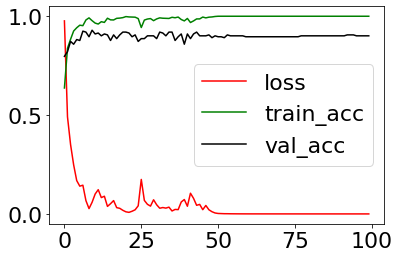

In [32]:
plt.plot(mlp_history.history['loss'],  color='red')
plt.plot(mlp_history.history['accuracy'],  color='green')
plt.plot(mlp_history.history['val_accuracy'], color='black')
plt.legend(['loss', 'train_acc', 'val_acc'])

Here we see difference between train and validation accuracy and small loss.
This means, that linear model is overfitting.
To avoid this we try more complex model - 1D convolution network.

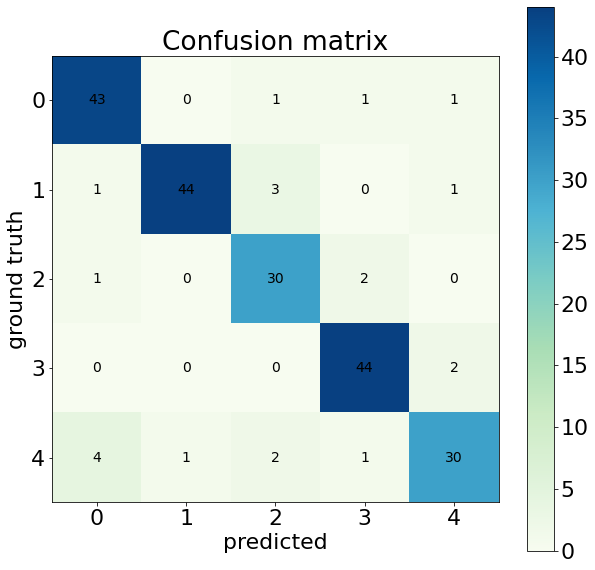

In [33]:
predictions = np.argmax(mlp.predict(X_val), axis=1)
gt = y_val.astype(np.int)
confusion_matrix = build_confusion_matrix(predictions, gt)
visualize_confusion_matrix(confusion_matrix)

In [34]:
mlp_metrics = calc_metrics(confusion_matrix)
mlp_metrics = pd.DataFrame(mlp_metrics)
mlp_metrics

,precision,recall,F1-score
0,0.877551,0.934783,0.905263
1,0.977778,0.897959,0.936170
2,0.833333,0.909091,0.869565
3,0.916667,0.956522,0.936170
4,0.882353,0.789474,0.833333


# Convolution Net from Keras tutorial

In [35]:
X_train, y_train, X_val, y_val = random_split_train_val(X, Y, 212)
X_train = np.expand_dims(X_train, axis=-1)
X_val = np.expand_dims(X_val, axis=-1)

In [36]:
conv_model_1 = Sequential([
    Input(X_train.shape[1:]),
    Conv1D(filters=64, kernel_size=3, padding='same'),
    BatchNormalization(),
    ReLU(),
    
    Conv1D(filters=64, kernel_size=3, padding='same'),
    BatchNormalization(),
    ReLU(),
    
    Conv1D(filters=64, kernel_size=3, padding='same'),
    BatchNormalization(),
    ReLU(),
    
    GlobalAveragePooling1D(),
    Dense(num_classes, activation='sigmoid')
])

optim = optimizers.Adam(2e-3)

conv_model_1.compile(loss='sparse_categorical_crossentropy', 
              optimizer=optim, metrics=['accuracy'])

In [37]:
history = conv_model_1.fit(X_train, y_train, validation_data=(X_val, y_val), 
                    epochs=100, batch_size=64,  verbose=1)

Epoch 1/100
27/27 [==============================] - 2s 40ms/step - loss: 1.4235 - accuracy: 0.4112 - val_loss: 1.7812 - val_accuracy: 0.2217
Epoch 2/100
27/27 [==============================] - 1s 34ms/step - loss: 1.2132 - accuracy: 0.5629 - val_loss: 1.5728 - val_accuracy: 0.2642
Epoch 3/100
27/27 [==============================] - 1s 31ms/step - loss: 1.1019 - accuracy: 0.6225 - val_loss: 1.5995 - val_accuracy: 0.3160
Epoch 4/100
27/27 [==============================] - 1s 33ms/step - loss: 1.0108 - accuracy: 0.6487 - val_loss: 1.4151 - val_accuracy: 0.3491
Epoch 5/100
27/27 [==============================] - 1s 33ms/step - loss: 0.9768 - accuracy: 0.6434 - val_loss: 1.4991 - val_accuracy: 0.3349
Epoch 6/100
27/27 [==============================] - 1s 34ms/step - loss: 0.9086 - accuracy: 0.6645 - val_loss: 1.4551 - val_accuracy: 0.3538
Epoch 7/100
27/27 [==============================] - 1s 33ms/step - loss: 0.8706 - accuracy: 0.6860 - val_loss: 1.5990 - val_accuracy: 0.3632
Epoch 

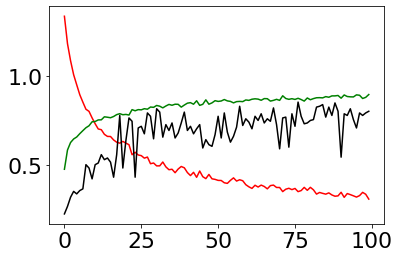

In [38]:
plt.plot(history.history['loss'],  color='red')
plt.plot(history.history['accuracy'],  color='green')
plt.plot(history.history['val_accuracy'], color='black')

Here we see big loss, low test accuracy and unstable predictions.  
Let's some tune network architechture.

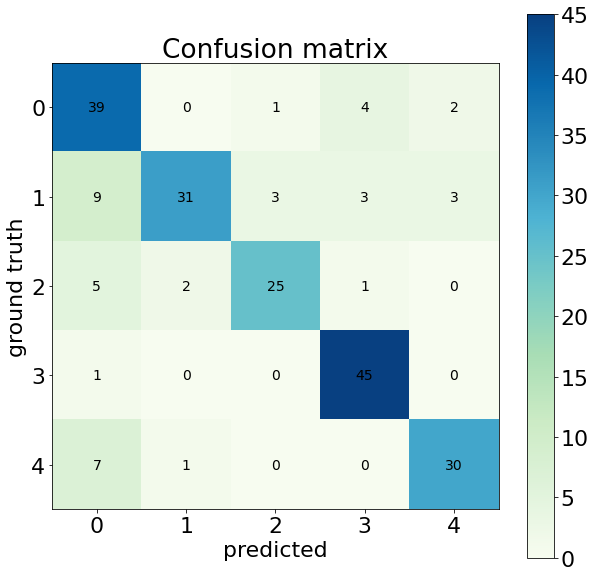

In [39]:
predictions = np.argmax(conv_model_1.predict(X_val), axis=1)
gt = y_val.astype(np.int)
confusion_matrix = build_confusion_matrix(predictions, gt)
visualize_confusion_matrix(confusion_matrix)

In [40]:
conv_metrics_1 = calc_metrics(confusion_matrix)
conv_metrics_1 = pd.DataFrame(conv_metrics_1)
conv_metrics_1

,precision,recall,F1-score
0,0.639344,0.847826,0.728972
1,0.911765,0.632653,0.746988
2,0.862069,0.757576,0.806452
3,0.849057,0.978261,0.909091
4,0.857143,0.789474,0.821918


# 2D Convolution Net with 2 layers

In [41]:
X = train_dataset[:,0:450]
Y = train_dataset[:,600]
X_train, y_train, X_val, y_val = random_split_train_val(X, Y, 212)

X_train = X_train.reshape(-1, 3, 150, 1)
X_val = X_val.reshape(-1, 3, 150, 1)

In [42]:
# best hyperparameters from grid search @see ConvNet_Grid_Search.ipynb
lr = 0.031623
n_filters_1 = 72
n_filters_2 = 88
kernel_size = 52
momentum = 0.99
batch_size = 80

In [43]:
conv_model_2 = Sequential([
        Input(X_train.shape[1:]),
        Conv2D(filters=n_filters_1, kernel_size=(2, kernel_size)),
        BatchNormalization(),
        ReLU(),

        Conv2D(filters=n_filters_2, kernel_size=2),
        BatchNormalization(),
        ReLU(),

        GlobalAveragePooling2D(),
        Dense(num_classes, activation='sigmoid')
    ])

optim = optimizers.SGD(lr, momentum)
    
conv_model_2.compile(loss='sparse_categorical_crossentropy', 
                  optimizer=optim, metrics=['accuracy'])

conv_history_2 = conv_model_2.fit(X_train, y_train, validation_data=(X_val, y_val),
                        epochs=100, batch_size=batch_size)

Epoch 1/100
22/22 [==============================] - 1s 18ms/step - loss: 1.2194 - accuracy: 0.5168 - val_loss: 6.1484 - val_accuracy: 0.6321
Epoch 2/100
22/22 [==============================] - 0s 13ms/step - loss: 0.5394 - accuracy: 0.8329 - val_loss: 8.9013 - val_accuracy: 0.6934
Epoch 3/100
22/22 [==============================] - 0s 13ms/step - loss: 0.4000 - accuracy: 0.8699 - val_loss: 11.0036 - val_accuracy: 0.6462
Epoch 4/100
22/22 [==============================] - 0s 13ms/step - loss: 0.3162 - accuracy: 0.8970 - val_loss: 12.0573 - val_accuracy: 0.5472
Epoch 5/100
22/22 [==============================] - 0s 13ms/step - loss: 0.2390 - accuracy: 0.9219 - val_loss: 9.4439 - val_accuracy: 0.6132
Epoch 6/100
22/22 [==============================] - 0s 13ms/step - loss: 0.1930 - accuracy: 0.9390 - val_loss: 7.1472 - val_accuracy: 0.6557
Epoch 7/100
22/22 [==============================] - 0s 13ms/step - loss: 0.2209 - accuracy: 0.9248 - val_loss: 5.5896 - val_accuracy: 0.6274
Epoc

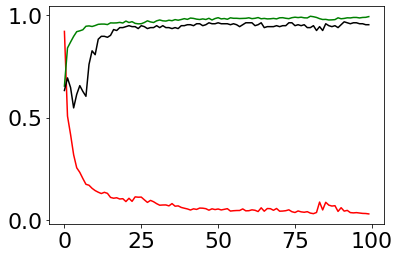

In [44]:
plt.plot(conv_history_2.history['loss'],  color='red')
plt.plot(conv_history_2.history['accuracy'],  color='green')
plt.plot(conv_history_2.history['val_accuracy'], color='black')

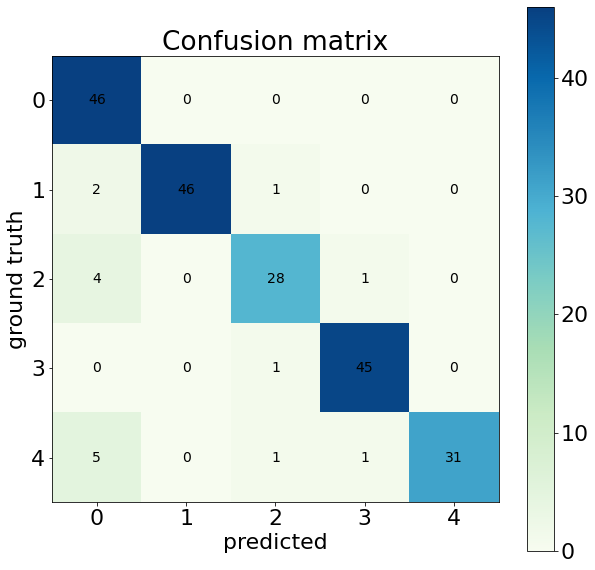

In [45]:
predictions = np.argmax(conv_model_2.predict(X_val), axis=1)
gt = y_val.astype(np.int)
confusion_matrix = build_confusion_matrix(predictions, gt)
visualize_confusion_matrix(confusion_matrix)

In [46]:
conv_metrics_2 = calc_metrics(confusion_matrix)
conv_metrics_2 = pd.DataFrame(conv_metrics_2)
conv_metrics_2

,precision,recall,F1-score
0,0.807018,1.000000,0.893204
1,1.000000,0.938776,0.968421
2,0.903226,0.848485,0.875000
3,0.957447,0.978261,0.967742
4,1.000000,0.815789,0.898551


# 2D Convolution Net with 4 layers

In [47]:
X = train_dataset[:,0:450]
Y = train_dataset[:,600]
X_train, y_train, X_val, y_val = random_split_train_val(X, Y, 212)

X_train = X_train.reshape(-1, 3, 150, 1)
X_val = X_val.reshape(-1, 3, 150, 1)

In [48]:
# RANDOM hyperparameters 
lr = 0.01
n_filters_1 = 32
n_filters_2 = 64
n_filters_3 = 96
kernel_size = 32
momentum = 0.99
batch_size = 64

In [49]:
conv_model_3 = Sequential([
        Input(X_train.shape[1:]),
        Conv2D(filters=n_filters_1, kernel_size=(2, kernel_size), padding="same" ),
        BatchNormalization(),
        ReLU(),

        Conv2D(filters=n_filters_2, kernel_size=2, padding="same"),
        BatchNormalization(),
        ReLU(),
    
        Conv2D(filters=n_filters_2, kernel_size=2, padding="same"),
        BatchNormalization(),
        ReLU(),
    
        Conv2D(filters=n_filters_3, kernel_size=2),
        BatchNormalization(),
        ReLU(),

        GlobalAveragePooling2D(),
        Dense(num_classes, activation='sigmoid')
    ])

optim = optimizers.SGD(lr, momentum)
    
conv_model_3.compile(loss='sparse_categorical_crossentropy', 
                  optimizer=optim, metrics=['accuracy'])

conv_history_3 = conv_model_3.fit(X_train, y_train, validation_data=(X_val, y_val),
                        epochs=100, batch_size=batch_size)

Epoch 1/100
27/27 [==============================] - 2s 45ms/step - loss: 1.3455 - accuracy: 0.4164 - val_loss: 2.6526 - val_accuracy: 0.2311
Epoch 2/100
27/27 [==============================] - 1s 39ms/step - loss: 0.7910 - accuracy: 0.7445 - val_loss: 3.3341 - val_accuracy: 0.4623
Epoch 3/100
27/27 [==============================] - 1s 40ms/step - loss: 0.5297 - accuracy: 0.8138 - val_loss: 4.3128 - val_accuracy: 0.5236
Epoch 4/100
27/27 [==============================] - 1s 39ms/step - loss: 0.3442 - accuracy: 0.8695 - val_loss: 7.7602 - val_accuracy: 0.4340
Epoch 5/100
27/27 [==============================] - 1s 39ms/step - loss: 0.2537 - accuracy: 0.9125 - val_loss: 8.6875 - val_accuracy: 0.4481
Epoch 6/100
27/27 [==============================] - 1s 39ms/step - loss: 0.1998 - accuracy: 0.9325 - val_loss: 5.0353 - val_accuracy: 0.4906
Epoch 7/100
27/27 [==============================] - 1s 39ms/step - loss: 0.1405 - accuracy: 0.9588 - val_loss: 2.6229 - val_accuracy: 0.6745
Epoch 

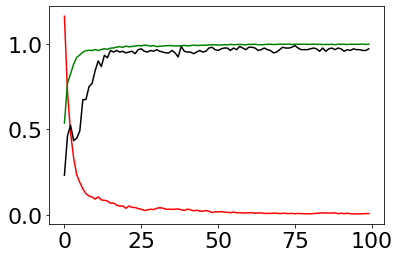

In [50]:
plt.plot(conv_history_3.history['loss'],  color='red')
plt.plot(conv_history_3.history['accuracy'],  color='green')
plt.plot(conv_history_3.history['val_accuracy'], color='black')

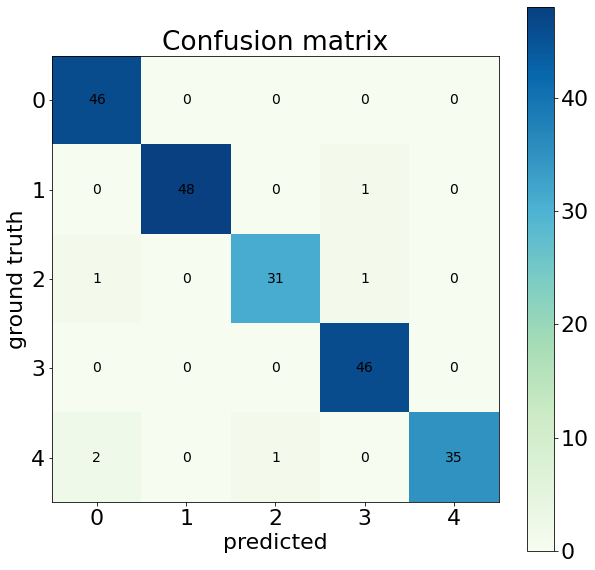

In [51]:
predictions = np.argmax(conv_model_3.predict(X_val), axis=1)
gt = y_val.astype(np.int)
confusion_matrix = build_confusion_matrix(predictions, gt)
visualize_confusion_matrix(confusion_matrix)

In [52]:
conv_metrics_3 = calc_metrics(confusion_matrix)
conv_metrics_3 = pd.DataFrame(conv_metrics_3)
conv_metrics_3

,precision,recall,F1-score
0,0.938776,1.000000,0.968421
1,1.000000,0.979592,0.989691
2,0.968750,0.939394,0.953846
3,0.958333,1.000000,0.978723
4,1.000000,0.921053,0.958904


In [53]:
# scores for all models and classes
pd.concat([mlp_metrics, conv_metrics_1, conv_metrics_2, conv_metrics_3], axis=1)

,precision,recall,F1-score,precision,recall,F1-score,precision,recall,F1-score,precision,recall,F1-score
0,0.877551,0.934783,0.905263,0.639344,0.847826,0.728972,0.807018,1.000000,0.893204,0.938776,1.000000,0.968421
1,0.977778,0.897959,0.936170,0.911765,0.632653,0.746988,1.000000,0.938776,0.968421,1.000000,0.979592,0.989691
2,0.833333,0.909091,0.869565,0.862069,0.757576,0.806452,0.903226,0.848485,0.875000,0.968750,0.939394,0.953846
3,0.916667,0.956522,0.936170,0.849057,0.978261,0.909091,0.957447,0.978261,0.967742,0.958333,1.000000,0.978723
4,0.882353,0.789474,0.833333,0.857143,0.789474,0.821918,1.000000,0.815789,0.898551,1.000000,0.921053,0.958904
